### Output: probability [0, 1] given input belonging to a class

In [17]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
train_dataset=dsets.MNIST(root="./data",
                          train=True,
                          transform=transforms.ToTensor,
                          download=True)

Processing...
Done!


In [11]:
test_dataset=dsets.MNIST(root="./data",
                          train=False,
                          transform=transforms.ToTensor()) # important: ToTensor() not ToTensor, with the ()

In [14]:
test_dataset[0][0].size()

torch.Size([1, 28, 28])

In [15]:
show_img=test_dataset[0][0].numpy().reshape(28,28)

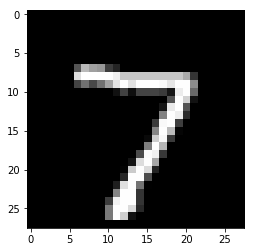

In [19]:
plt.imshow(show_img, cmap="gray")
plt.show()

In [20]:
# labels
test_dataset[0][1]

7

## make dataset iterable
- total: 60000
- batch_size: 100
- iterations: 3000
    - 1 iter: one minibatch forward and backward pass
- epochs
    - 1 epoch: running through the whole dataset once
    - epochs = $$ iter \div \frac{total data}{batchsize}= \frac{iter}{batches}=3000 \div \frac{60000}{100}=5 $$

In [22]:
iter=3000
batch_size=100
num_epochs=iter/(len(train_dataset)/batch_size)
num_epochs

5.0

### create iterable object from training dataset

In [23]:
train_gen=torch.utils.data.DataLoader(dataset=train_dataset,
                                     batch_size=batch_size,
                                     shuffle=True)

### check iterability

In [25]:
import collections
isinstance(train_gen, collections.Iterable)

True

### do the same for test dataset (shuffle = False for test data !!)

In [27]:
test_gen=torch.utils.data.DataLoader(dataset=test_dataset,
                                     batch_size=batch_size,
                                     shuffle=False)

## build the model

In [28]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear=nn.Linear(in_features=input_size, out_features=output_size)
    
    def forward(self, x):
        return self.linear(x)

In [29]:
input_dim=28*28
output_dim=10

model=LogisticRegressionModel(input_dim, output_dim)

### loss function
- CrossEntropyLoss
    - softmax
    - cross entropy

In [30]:
criterion=nn.CrossEntropyLoss()

### optimizer function
$$\theta = \theta - \eta \cdot \triangledown_{\theta}$$

In [32]:
learning_rate=0.001
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [36]:
print(list(model.parameters()))

[Parameter containing:
1.00000e-02 *
 2.0430 -1.4102  3.0230  ...   1.2977  2.7280  2.3014
 1.5703 -0.4671 -0.4509  ...  -2.1584 -1.1998 -2.5113
-3.2384  0.9226  2.6514  ...  -1.5847  2.8715  0.2394
          ...             ⋱             ...          
 2.5621  1.1655 -2.5752  ...   0.6843 -0.3177  2.5184
 3.1691 -1.7881 -3.0941  ...  -3.2183  1.4276 -0.9740
 1.7864 -2.6409 -0.9407  ...   0.4672  1.1779  2.6315
[torch.FloatTensor of size 10x784]
, Parameter containing:
1.00000e-02 *
 -1.5276
  1.0308
 -1.6976
  1.2017
 -0.3224
  2.6856
  1.6281
  0.8288
  3.1117
 -1.0356
[torch.FloatTensor of size 10]
]


In [39]:
# FC 1 parameters
list(model.parameters())[0]

Parameter containing:
1.00000e-02 *
 2.0430 -1.4102  3.0230  ...   1.2977  2.7280  2.3014
 1.5703 -0.4671 -0.4509  ...  -2.1584 -1.1998 -2.5113
-3.2384  0.9226  2.6514  ...  -1.5847  2.8715  0.2394
          ...             ⋱             ...          
 2.5621  1.1655 -2.5752  ...   0.6843 -0.3177  2.5184
 3.1691 -1.7881 -3.0941  ...  -3.2183  1.4276 -0.9740
 1.7864 -2.6409 -0.9407  ...   0.4672  1.1779  2.6315
[torch.FloatTensor of size 10x784]

In [41]:
# FC 1 bias parameters
blist(model.parameters())[1]

Parameter containing:
1.00000e-02 *
 -1.5276
  1.0308
 -1.6976
  1.2017
 -0.3224
  2.6856
  1.6281
  0.8288
  3.1117
 -1.0356
[torch.FloatTensor of size 10]

![]()

## train model
- convert inputs images and labels to Variables
- clear gradient buffets
- get output given inputs